# 1. Load dataset
#### In this assignment, you are expected to build a model that finds clusters in the given news articles dataset.
#### You will need to read the data from data file (news.xlsx). It contains three columns: news category, news title, and the news content.

In [104]:
import numpy as np
import pandas as pd

In [105]:
df = pd.read_excel("C:/Users/ACER/Downloads/news.xlsx")
df

,Category,Title,News_Article
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ..."
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...
...,...,...,...
49995,Siyasət,Əli Kərimli terrorçularla da əməkdaşlığa hazır...,"AXCP sədri ""Milli Şura""nın mitinqində qəsdən..."
49996,Siyasət,Elşən Musayev: “Bəlkə elə o terrorist Əli Kəri...,"""Ümumiyyətlə, Milli Şuraya xoş olan, hətta o..."
49997,Dünya,İstanbulda 52 mərtəbəli binada yanğın baş verib,Türkiyənin İstanbul şəhərinin Ataşehir rayon...
49998,Dünya,“Onlar cinayətkarlardır və bir-bir məhv edilir...,Rusiyanı tərk edərək İŞİD sıralarında döyüşə...


# 2. Data preprocessing
#### You are expected to extract features from the news articles using tf-idf representation techniques. You can use TfidfVectorizer for this purpose. You may want to limit the vocabulary size by choosing most frequent 3000 tokens. Experiment with different sizes.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      50000 non-null  object
 1   Title         50000 non-null  object
 2   News_Article  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [107]:
df.isnull().sum()

Category        0
Title           0
News_Article    0
dtype: int64

In [ ]:
import string
from nltk.corpus import stopwords
nonums = [char for char in mess if char not in string.digits]
nonums = ''.join(nonums)

In [110]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["News_Article"])
X

<50000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 3334929 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000,preprocessor=lambda x: re.sub(r'(\d[\d\.])+', '', x.lower()))
X_train_counts = tfidf.fit_transform(X_train.ravel())
X_test_counts=tfidf.transform(X_test.ravel())

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000,stopwords=[])
X = vectorizer.fit_transform(df["News_Article"])
X

<50000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 3334929 stored elements in Compressed Sparse Row format>

In [90]:
X.shape

(50000, 3000)

In [91]:
vectorizer.get_feature_names_out()

array(['00', '000', '01', ..., 'əziyyət', 'əziz', 'ال'], dtype=object)

In [ ]:
a=vectorizer.get_feature_names_out()
for i in a:
    
    if i.isdigit():
        print(i)
len(list1)

In [93]:
type(a)

numpy.ndarray

In [ ]:
vocabulary = a[113:]
vocabulary

In [ ]:
vocabulary.shape

In [ ]:
type(vocabulary)

# 3. PCA
#### Apply PCA on the prepared data with 3 components.

In [100]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
svd = TruncatedSVD(n_components=390)
svd_fit = svd.fit_transform(X)

In [101]:
svd_fit

array([[ 0.076297  ,  0.03392207,  0.18397105, ...,  0.00320787,
         0.02302207,  0.01093229],
       [ 0.27741802, -0.06935121,  0.23810921, ...,  0.00854481,
        -0.00132357,  0.02031031],
       [ 0.11970573, -0.00758479,  0.09244615, ...,  0.03344928,
        -0.01479345, -0.00834143],
       ...,
       [ 0.09450276,  0.00575435, -0.13848082, ...,  0.00343529,
         0.00760287,  0.00237344],
       [ 0.24694654, -0.088912  , -0.02796217, ...,  0.00440484,
        -0.00704801, -0.01097459],
       [ 0.22468262, -0.04773247, -0.10835822, ..., -0.0111961 ,
         0.01196605,  0.02065122]])

# 4. Visualization
#### Visualize the data in 3D.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 5. Clustering
#### Apply Kmeans clustering on the data.

# 6. Visualization
#### Visualize the data in 3D with cluster as color. Use plotly to make it interactive.
#### Your plot should look like the following:
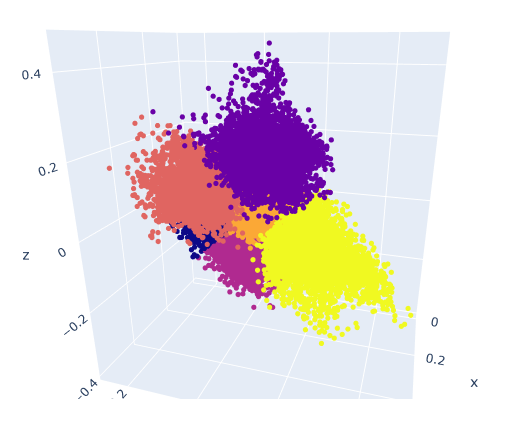